<a href="https://colab.research.google.com/github/PepiMartin28/Medical-Data-Visualizer/blob/main/Medical_Data_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Import the data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/PepiMartin28/Medical-Data-Visualizer/main/medical_examination.csv")

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Age, expressed in days, is changed to an age expressed in years

In [3]:
df["age"] = (df["age"]/365).astype(int)

Add 'overweight' column

In [4]:
df["BMI"] = df["weight"]/((df["height"]/100)**2)

In [5]:
df["overweight"] = df["BMI"].apply(lambda x: 1 if x > 25 else 0)

In [6]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [7]:
df["cholesterol"] = df["cholesterol"].apply(lambda x: 1 if x > 1 else 0)

In [8]:
df["gluc"] = df["gluc"].apply(lambda x: 1 if x > 1 else 0)

In [9]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,50,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,55,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,51,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,48,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,47,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


In [10]:
df.shape

(70000, 15)

#Clean the data. Filter out the following patient segments that represent incorrect data

diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))

In [12]:
df = df.drop((df[df['ap_lo'] >= df['ap_hi']]).index)

df.shape

(68764, 15)

Height is less than the 97.5th percentile

In [13]:
df = df.drop((df[df["height"]>=df['height'].quantile(0.975)]).index)

df.shape

(66504, 15)

Height is more than the 2.5th percentile

In [14]:
df = df.drop((df[df["height"]<=df['height'].quantile(0.025)]).index)

df.shape

(63971, 15)

Weight is less than the 97.5th percentile

In [16]:
df = df.drop((df[df["weight"]>=df['weight'].quantile(0.975)]).index)

df.shape

(60506, 15)

Weight is more than the 2.5th percentile

In [15]:
df = df.drop((df[df["weight"]<=df['weight'].quantile(0.025)]).index)

df.shape

(62171, 15)

#Cat Plot

Create DataFrame for cat plot using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'

In [17]:
df_cat = pd.melt(df[['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight', 'cardio']], id_vars = ["cardio"])

Group and reformat the data to split it by 'cardio'. Show the counts of each feature.

In [18]:
df_cat = df_cat.groupby(["cardio",'variable', 'value']).size().reset_index(name='count')

Cat Plot

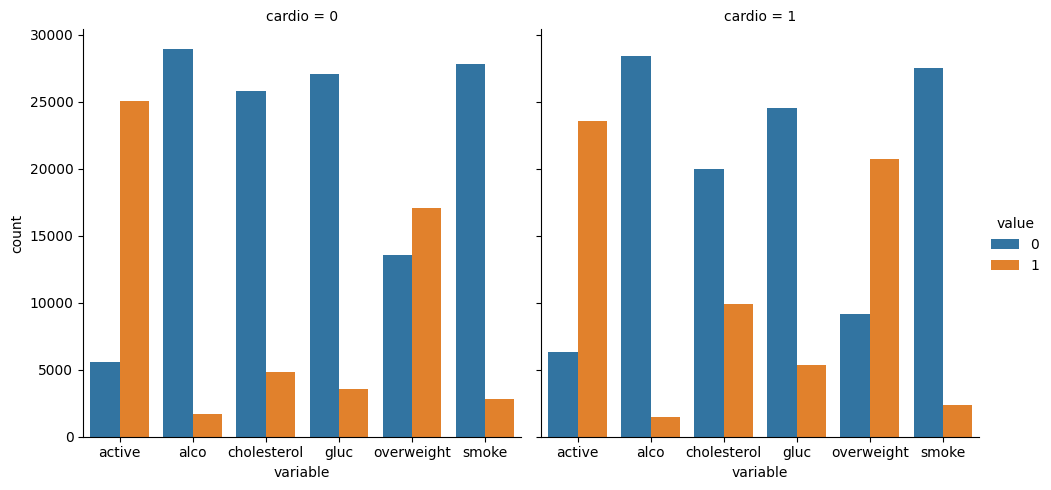

In [21]:
fig = sns.catplot(data = df_cat, x="variable", y="count", hue='value', col="cardio", kind="bar")

#Heat Map of correlation matrix

Heat map with all correlation matrix

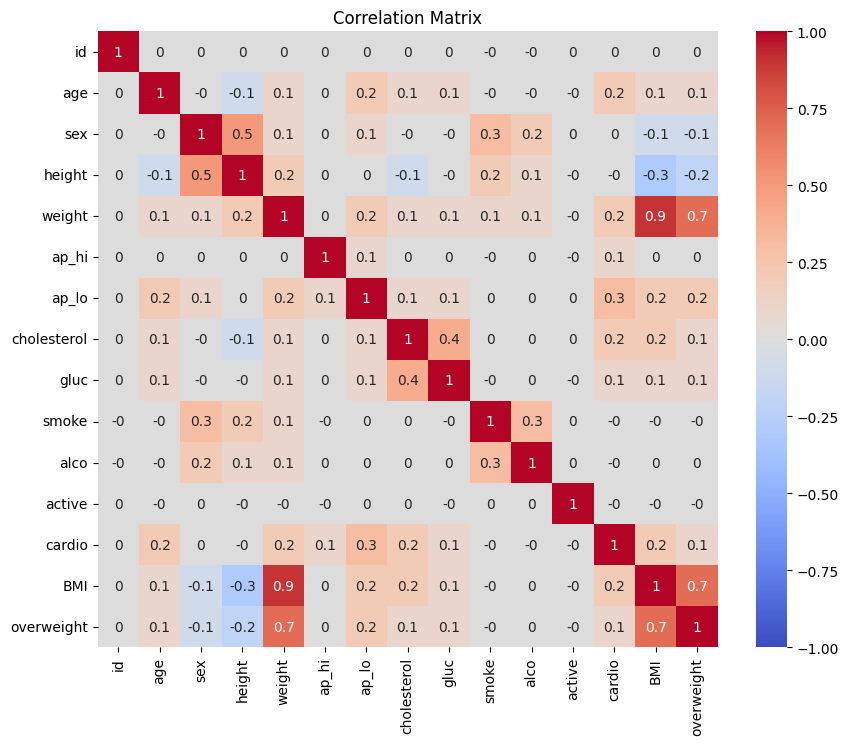

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr().round(1), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Heat map for the lower triangle of the correlation matrix

In [27]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

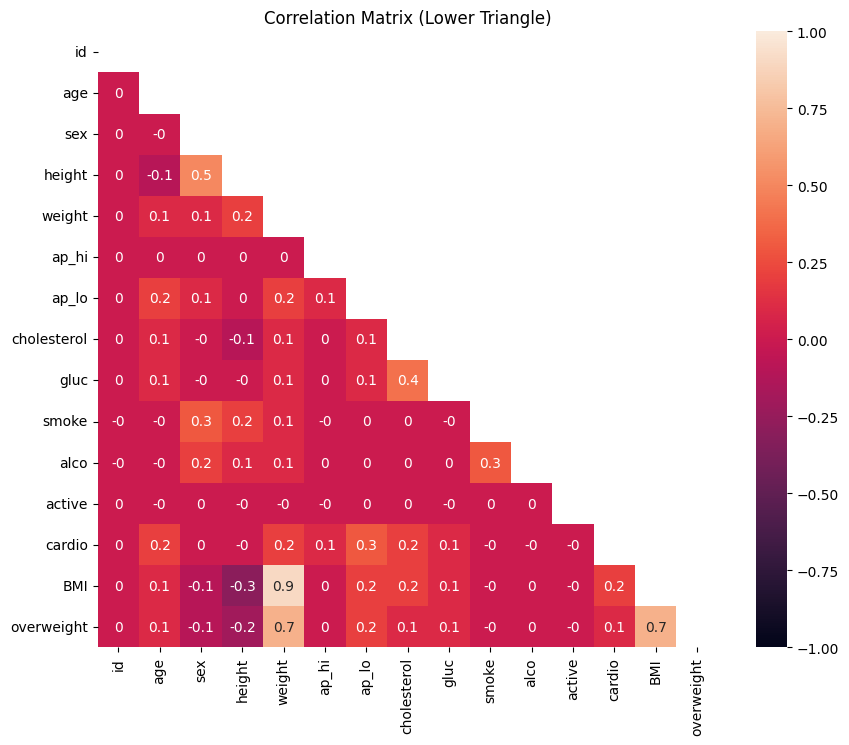

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr().round(1), mask=mask, annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix (Lower Triangle)')
plt.show()